Step 1: 
Install wkhtmltopdf on Windows
Download wkhtmltopdf from this link https://wkhtmltopdf.org/downloads.html.
Install it (Choose the Windows version).
Find the installation path (Usually: C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe).



In [ ]:
##Step 2:
## !pip install pdfkit markdown
 

Step 3: Set Up pdfkit for Windows

In [ ]:
import markdown
import pdfkit

# Path to wkhtmltopdf.exe (Update if installed elsewhere)
config = pdfkit.configuration(wkhtmltopdf=r"C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe")

# Markdown content
md_content = """ 
# Customer Churn Prediction - Project Summary

## 1. Business Problem
Customer churn occurs when a customer stops using a company's services. 
High churn rates can significantly impact revenue and customer retention efforts. 
Our goal is to predict and reduce customer churn using machine learning.

## 2. Data Sources
The project will use multiple data sources:
- **Customer transactions** (SQL Database)
- **Web activity logs** (API data)
- **Demographics & customer profiles** (CSV files)

## 3. Expected Outputs
The pipeline will generate:
- **Clean datasets** for exploratory data analysis (EDA)
- **Feature-engineered datasets** for model training
- **A trained machine learning model** to predict churn

## 4. Evaluation Metrics
To assess model performance, we will use:
- **Accuracy**: Overall correctness of predictions
- **Precision**: Correct churn predictions out of total churn predictions
- **Recall**: Ability to detect actual churn cases
- **F1 Score**: Balance between precision and recall
"""

# Convert markdown content to HTML
html_content = markdown.markdown(md_content)

# Convert HTML to PDF
pdfkit.from_string(html_content, "churn_summary.pdf", configuration=config)

print("PDF file created: churn_summary.pdf")


Data Ingestion

In [2]:
import pandas as pd
import pyodbc

# Connection string (replace with your details)
conn_string = "DRIVER={SQL Server};SERVER=INBAN-LT2T5SQV3;DATABASE=MLDB;UID=sa;PWD=SQLserver2022*"
 
# Create a connection
connection = pyodbc.connect(conn_string )
 
# Run the query to the customers table
query = 'SELECT top 10 * FROM Customers order by 1 desc'
df = pd.read_sql_query(query, connection)

# Display the DataFrame
print(df) 




  CustomerID Age  Gender Tenure Usage Frequency Support Calls Payment Delay  \
0       9999  34    Male     20              11             7            13   
1       9998  62  Female     17              30             2             9   
2       9997  55    Male     18               1             4             2   
3       9996  36    Male      3              14             6            25   
4       9995  20  Female     20              26             7            23   
5       9994  24  Female     53              21             6            29   
6       9993  28    Male      4              10             6             7   
7       9992  34  Female     41              22             8             7   
8       9991  48    Male     42              11             4            16   
9       9990  19  Female     27              17             7             2   

  Subscription Type Contract Length Total Spend Last Interaction Churn  
0           Premium         Monthly         764          

C:\Users\doddasp\AppData\Local\Temp\ipykernel_42760\3031949658.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [3]:
#From CSV
import pandas as pd
pd.options.display.max_rows = 3
df = pd.read_csv('C:\Python\Plab\Sem2\DMML\customer_churn_dataset-testing-master.csv')
df

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\doddasp\AppData\Local\Temp\ipykernel_42760\2639721778.py:4: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('C:\Python\Plab\Sem2\DMML\customer_churn_dataset-testing-master.csv')


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64375,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


Raw Data Storage

In [4]:
import pyodbc
import pandas as pd

# Database connection parameters
server = '.'  # e.g., 'localhost' or '192.168.1.5'
database = 'MLDB'
username = 'sa'
password = 'SQLserver2022*'

# Establish connection
try:
    conn = pyodbc.connect(
        f'DRIVER={{ODBC Driver 17 for SQL Server}};'
        f'SERVER={server};'
        f'DATABASE={database};'
        f'UID={username};'
        f'PWD={password}'
    )
    
    # SQL query to execute
    query = "SELECT * FROM Customers"
    
    # Read data into pandas DataFrame
    df = pd.read_sql(query, conn)
    
    # Save to CSV

    # Open the file in write mode to erase existing content
    with open("C:\Python\Plab\Sem2\DMML\Data_storage\customer.csv", "w") as f:
        f.truncate()
        print("Data Truncated")
        f
    
    df.to_csv('C:\Python\Plab\Sem2\DMML\Data_storage\customer.csv', index=False)
    print("Data successfully exported to Customer.csv")

except pyodbc.Error as e:
    print(f"Database error: {str(e)}")

finally:
    # Close connection
    if 'conn' in locals():
        conn.close()

<>:29: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:29: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
C:\Users\doddasp\AppData\Local\Temp\ipykernel_42760\2840965373.py:29: SyntaxWarning: invalid escape sequence '\P'
  with open("C:\Python\Plab\Sem2\DMML\Data_storage\customer.csv", "w") as f:
C:\Users\doddasp\AppData\Local\Temp\ipykernel_42760\2840965373.py:34: SyntaxWarning: invalid escape sequence '\P'
  df.to_csv('C:\Python\Plab\Sem2\DMML\Data_storage\customer.csv', index=False)
C:\Users\doddasp\AppData\Local\Temp\ipykernel_42760\2840965373.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data Truncated
Data successfully exported to Customer.csv


Data Validation

In [65]:
#import great_expectations as ge

#df = ge.from_pandas(pd.read_csv("C:\Python\Plab\Sem2\DMML\Data_storage\customer.csv"))
#print(df.expect_column_values_to_not_be_null("customer_id"))

import pandas as pd
import numpy as np

def check_data_quality(input_file, report_file="data_quality_report.csv"):
    # Load dataset
    df = pd.read_csv(input_file)

    # Report dictionary to store results
    report = []

    # 1️⃣ Check for Missing Values
    missing_values = df.isnull().sum()
    for col, count in missing_values.items():
        if count > 0:
            report.append({"Check": "Missing Values", "Column": col, "Issue": f"{count} missing values"})

    # 2️⃣ Validate Data Types
    expected_types = {
        'int64': 'Integer',
        'float64': 'Float',
        'object': 'String',
        'datetime64[ns]': 'Datetime'
    }
    
    for col, dtype in df.dtypes.items():
        report.append({"Check": "Data Type Validation", "Column": col, "Issue": f"Expected {expected_types.get(str(dtype), 'Unknown')} - Found {dtype}"})

    # 3️⃣ Check for Inconsistent Data (Negative Values in Non-Negative Fields)
    for col in df.select_dtypes(include=['number']).columns:
        if (df[col] < 0).sum() > 0:
            report.append({"Check": "Inconsistent Data", "Column": col, "Issue": f"{(df[col] < 0).sum()} negative values found"})

    # 4️⃣ Validate Date Format
    date_cols = [col for col in df.columns if 'date' in col.lower()]
    for col in date_cols:
        try:
            df[col] = pd.to_datetime(df[col], errors='raise')
        except Exception as e:
            report.append({"Check": "Date Format Validation", "Column": col, "Issue": str(e)})

    # 5️⃣ Check for Outliers (Values Beyond 1.5*IQR)
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        if outliers > 0:
            report.append({"Check": "Outlier Detection", "Column": col, "Issue": f"{outliers} potential outliers detected"})

    # 6️⃣ Identify Duplicates
    duplicate_rows = df.duplicated().sum()
    if duplicate_rows > 0:
        report.append({"Check": "Duplicate Rows", "Column": "All Columns", "Issue": f"{duplicate_rows} duplicate rows found"})

    # Convert report to DataFrame and Save
    report_df = pd.DataFrame(report)
    report_df.to_csv(report_file, index=False)

    print(f" Data quality report generated: {report_file}")

# Usage Example
if __name__ == "__main__":
    input_csv = r"C:\Python\Plab\Sem2\DMML\customer_churn_dataset-testing-master.csv"
    output_report = r"C:\Python\Plab\Sem2\DMML\Output\data_quality_report.csv"
    check_data_quality(input_csv, output_report)




 Data quality report generated: C:\Python\Plab\Sem2\DMML\Output\data_quality_report.csv


Data Preparation


📊 Summary Statistics:
          CustomerID           Age   Gender       Tenure  Usage Frequency  \
count  64376.000000  64376.000000  64376.0  64376.00000     64376.000000   
...             ...           ...      ...          ...              ...   
max        1.732024      1.653843      1.0      1.63792         1.692256   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64376.000000    64376.00000  64376.000000      64376.000000   
...              ...            ...           ...               ...   
max         1.476964        1.45347      1.759407          1.678658   

              Churn  
count  64376.000000  
...             ...  
max        1.054122  

[8 rows x 10 columns]


<Figure size 1000x500 with 0 Axes>

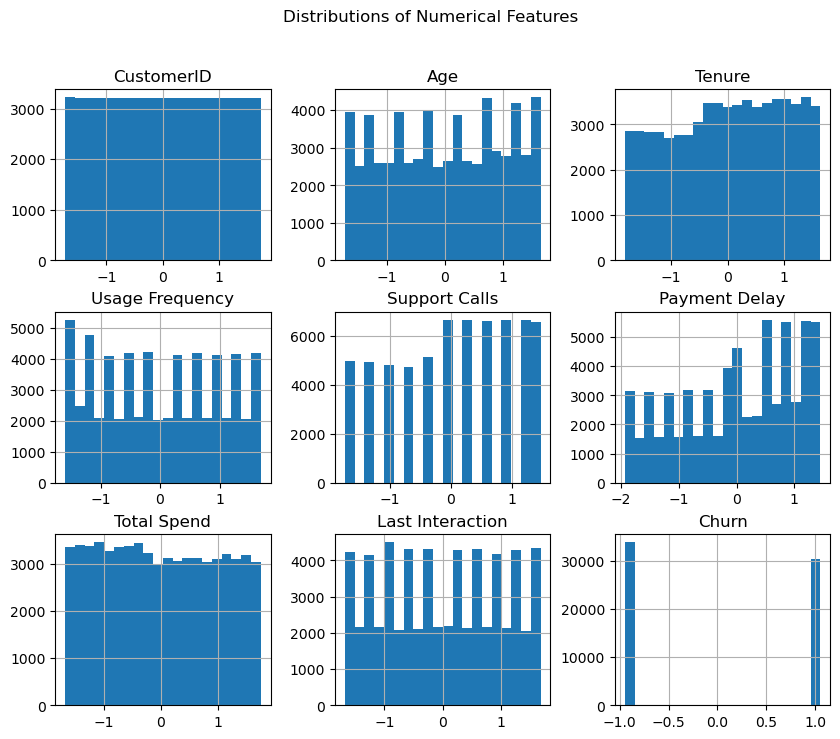

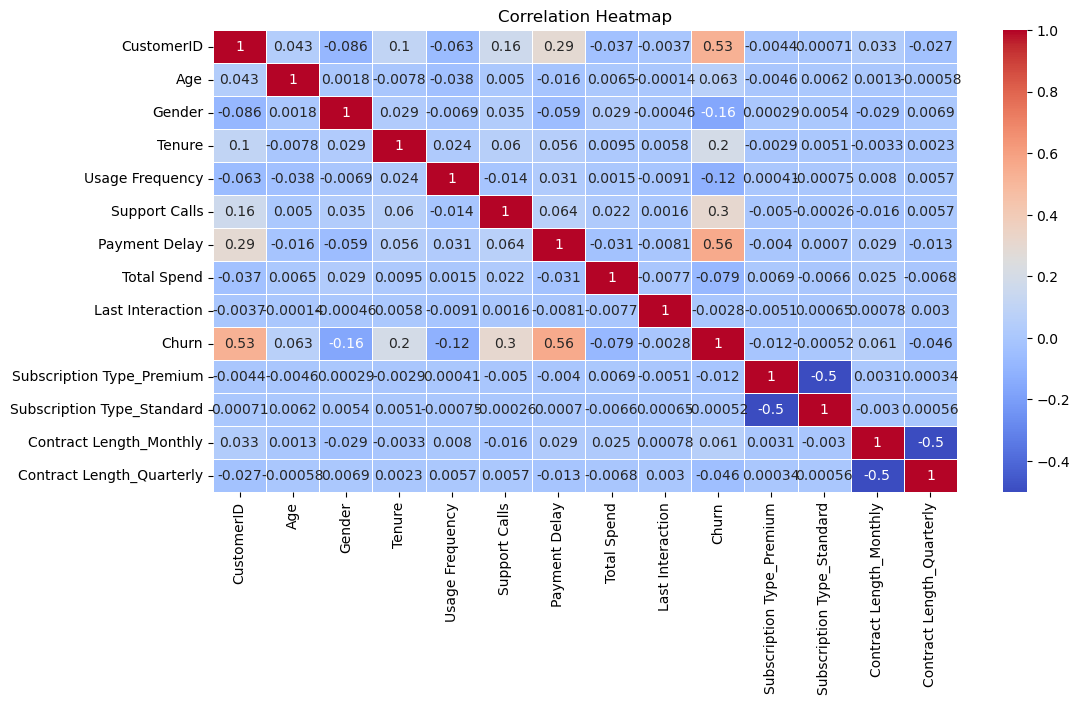

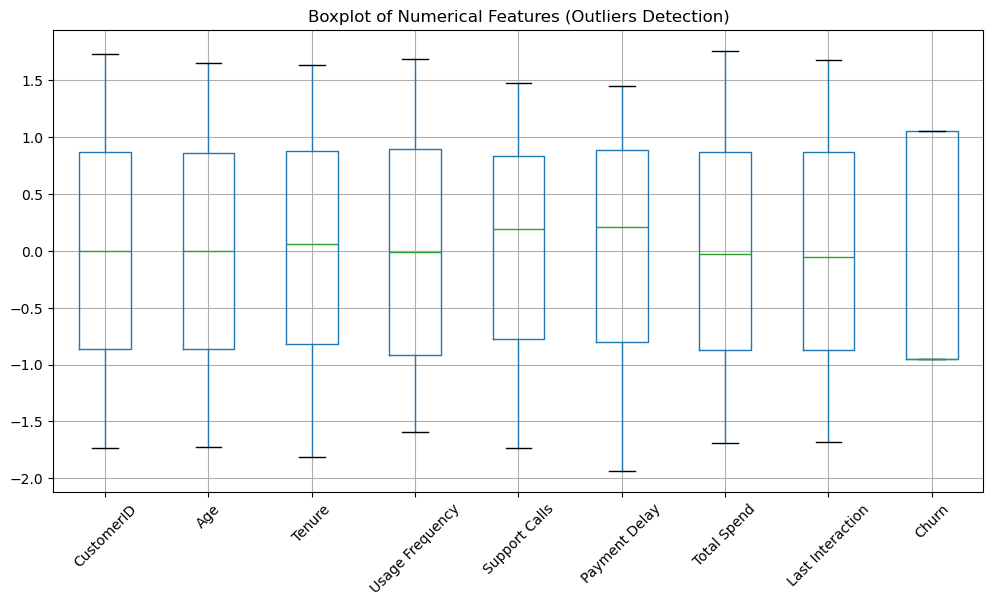


✅ Cleaned dataset saved to: C:\Python\Plab\Sem2\DMML\Output\cleaned_data.csv


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Define file paths
input_csv = r"C:\Python\Plab\Sem2\DMML\customer_churn_dataset-testing-master.csv"
output_cleaned_csv = r"C:\Python\Plab\Sem2\DMML\Output\cleaned_data.csv"

# Load dataset
df = pd.read_csv(input_csv)

### 🚀 1. Handle Missing Values ###
# Option 1: Drop columns with too many missing values (>50%)
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Option 2: Fill missing numerical values with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Option 3: Fill missing categorical values with mode (most frequent)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

### 🚀 2. Standardize or Normalize Numerical Attributes ###
scaler = StandardScaler()  # Standardization (mean=0, std=1)
# scaler = MinMaxScaler()  # Uncomment for Normalization (0 to 1)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

### 🚀 3. Encode Categorical Variables ###
# Label Encoding for binary categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).nunique()[df.nunique() == 2].index:
    df[col] = label_enc.fit_transform(df[col])

# One-Hot Encoding for other categorical columns
df = pd.get_dummies(df, drop_first=True)

### 🚀 4. Perform Exploratory Data Analysis (EDA) ###
print("\n📊 Summary Statistics:\n", df.describe())

# Distribution of numerical variables
plt.figure(figsize=(10, 5))
df[num_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distributions of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Detect outliers using boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()

# Save cleaned dataset
df.to_csv(output_cleaned_csv, index=False)
print(f"\n✅ Cleaned dataset saved to: {output_cleaned_csv}")



Data Transformation and Storage

In [ ]:
import pandas as pd
import numpy as np
import pyodbc
from sqlalchemy import create_engine
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define file paths
input_csv = r"C:\Python\Plab\Sem2\DMML\Output\cleaned_data.csv"

# Load dataset
df = pd.read_csv(input_csv)

### 🚀 1. Create Aggregated Features ###
if "TotalCharges" in df.columns and "MonthlyCharges" in df.columns:
    df["AvgMonthlySpend"] = df["TotalCharges"] / (df["MonthlyCharges"] + 1)

if "tenure" in df.columns:
    df["TenureYears"] = df["tenure"] / 12  # Convert tenure from months to years

### 🚀 2. Derive New Features ###
# Example: Calculate Recency if last transaction date is available
if "LastTransactionDate" in df.columns:
    df["LastTransactionDate"] = pd.to_datetime(df["LastTransactionDate"])
    df["RecencyDays"] = (datetime.today() - df["LastTransactionDate"]).dt.days

# Example: Customer Activity Frequency
if "TotalCalls" in df.columns and "TotalCharges" in df.columns:
    df["CallToChargeRatio"] = df["TotalCalls"] / (df["TotalCharges"] + 1)

### 🚀 3. Scale & Normalize Features ###
scaler = StandardScaler()  # Standardization (mean=0, std=1)
# scaler = MinMaxScaler()  # Uncomment for Normalization (0 to 1)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

### 🚀 4. Store Transformed Data in SQL Server MLDB ###
# SQL Server Connection Details
server = "."
database = "MLDB"
username = "sa"
password = "SQLserver2022*"
table_name = "TransformedCustomerData"

# Create connection string
conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create SQLAlchemy engine
engine = create_engine(conn_str)

# Write to SQL Server
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"\n✅ Transformed data stored in SQL Server table: {table_name}")



✅ Transformed data stored in SQL Server table: TransformedCustomerData



SQL Queries:

SELECT * FROM TransformedCustomerData;

SELECT CustomerID, AvgMonthlySpend
FROM TransformedCustomerData
ORDER BY AvgMonthlySpend DESC
LIMIT 10;

SELECT CustomerID, TenureYears, RecencyDays, CallToChargeRatio
FROM TransformedCustomerData
WHERE TenureYears < 1 AND RecencyDays > 180;

SELECT 
    AVG(AvgMonthlySpend) AS Avg_Spend, 
    AVG(TenureYears) AS Avg_Tenure, 
    AVG(CallToChargeRatio) AS Avg_CallToCharge
FROM TransformedCustomerData;

SELECT CustomerID, CallToChargeRatio
FROM TransformedCustomerData
WHERE CallToChargeRatio > (SELECT AVG(CallToChargeRatio) + 2 * STDEV(CallToChargeRatio) FROM TransformedCustomerData);

Summary of Transformation Logic Applied :

Transformation Type		    Feature(s) Affected		Logic Applied
Aggregated Features		    AvgMonthlySpend		    TotalCharges / (MonthlyCharges + 1) to avoid division by zero
Derived Features		    TenureYears		        Converted tenure from months to years (tenure / 12)
                            RecencyDays		        CurrentDate - LastTransactionDate in days
                            CallToChargeRatio		TotalCalls / (TotalCharges + 1) to normalize ratio
Scaling & Normalization		All numeric columns		Standardization (mean=0, std=1) using StandardScaler
Missing Value Handling		All columns		        Imputed missing numerical values with median, categorical with mode
Encoding		            Categorical columns		Binary: Label Encoding, Multi-category: One-Hot Encoding


In [ ]:
df["customer_tenure"] = (pd.to_datetime("today") - pd.to_datetime(df["signup_date"])).dt.days


Feature Store

In [ ]:
import feast
fs = feast.FeatureStore(repo_path="feature_repo")
features = fs.get_online_features(
    entity_rows=[{"customer_id": 12345}],
    feature_refs=["customer:total_spent", "customer:num_orders"]
)


Data Versioning

In [ ]:
dvc init
dvc add raw_data/api_customers.csv
git add raw_data/.gitignore raw_data/api_customers.csv.dvc
git commit -m "Versioned dataset"


Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("churn", axis=1), df["churn"], test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save Model
import joblib
joblib.dump(model, "models/churn_model.pkl")


Orchestration (Airflow)

In [ ]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator

dag = DAG('customer_churn_pipeline', schedule_interval='@daily')

def ingest_data():
    # Call ingestion scripts here
    pass

ingestion_task = PythonOperator(task_id='data_ingestion', python_callable=ingest_data, dag=dag)
